# Linear Regression and KNeighbors Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path =r"Advertising.csv"
df = pd.read_csv(path)
df.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.isnull().sum()/len(df)*100

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

<Axes: >

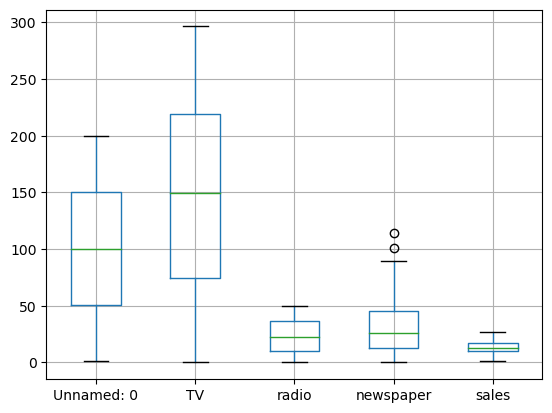

In [8]:
# checking outlier
df.boxplot()

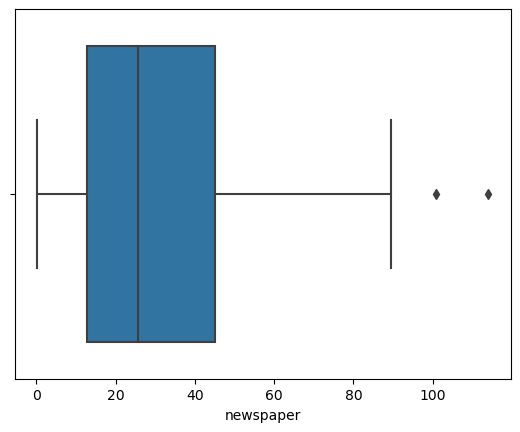

In [17]:
sns.boxplot(x=df['newspaper'])
plt.show()

In [16]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [19]:
Q1 = 12.750000
Q3 = 45.100000
IQR = Q3-Q1
UB = Q3+1.5*IQR
df['newspaper']=np.where(df['newspaper']>UB,UB,df['newspaper'])
df['newspaper'].head()

0    69.2
1    45.1
2    69.3
3    58.5
4    58.4
Name: newspaper, dtype: float64

In [20]:
# Feature Selection

X = df[["TV","radio","newspaper"]]
Y = df[["sales"]]

In [23]:
X.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [22]:
Y.head(2)

,sales
0,22.1
1,10.4


In [27]:
# feature scaling only for X independent feature

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_trans = ss.fit_transform(X)
X_trans

array([[ 9.69852266e-01,  9.81522472e-01,  1.82397883e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.90583449e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.82868171e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.32077009e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.31606721e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.09674618e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.25239797e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.84883159e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.38338901e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.33406161e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92319599e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.24230245e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.66878361e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.09181012e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.32909417e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.05740851e+00],
       [-9.25304978e-01,  9.00494200e-01

In [33]:
# data split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X_trans,Y,test_size=.25,random_state=50)

In [44]:
# calling models and sending training data

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
lr=LinearRegression()
kn= KNeighborsRegressor(n_neighbors = 5)

lr.fit(x_train,y_train)
print("LR training score", lr.score(x_train,y_train))

kn.fit(x_train,y_train)
print("KN training score", kn.score(x_train,y_train))

LR training score 0.8986017981448885
KN training score 0.9586212523989224


In [50]:
# testing

lr_predict=lr.predict(x_test)
kn_predict=kn.predict(x_test)

In [56]:
y_test.head(2)
# as index is not proper

,sales
112,14.1
165,11.9


In [51]:
# creating result variable
result= y_test.reset_index(drop=True)
result.head(2)

,sales
0,14.1
1,11.9


In [52]:
result["LR_prediction"]=lr_predict
result["KN_prediction"]=kn_predict
result.head(2)

,sales,LR_prediction,KN_prediction
0,14.1,13.803269,14.84
1,11.9,14.681715,13.60


## model performance

In [53]:
result["LR_Error"]=result["sales"]-result["LR_prediction"]
result["KN_Error"]=result["sales"]-result["KN_prediction"]
result.head(2)

,sales,LR_prediction,KN_prediction,LR_Error,KN_Error
0,14.1,13.803269,14.84,0.296731,-0.74
1,11.9,14.681715,13.60,-2.781715,-1.70


In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("R2 score of LR : ",r2_score(result["sales"],result["LR_prediction"]))
print("MSE score of LR : ",mean_squared_error(result["sales"],result["LR_prediction"]))
print("MAE score of LR : ",mean_absolute_error(result["sales"],result["LR_prediction"]))

print("R2 score of KN : ",r2_score(result["sales"],result["KN_prediction"]))
print("MSE score of KN : ",mean_squared_error(result["sales"],result["KN_prediction"]))
print("MAE score of KN : ",mean_absolute_error(result["sales"],result["KN_prediction"]))


R2 score of LR :  0.878659067840701
MSE score of LR :  2.124396269691801
MAE score of LR :  1.1261241620324294
R2 score of KN :  0.9534219985030556
MSE score of KN :  0.8154719999999998
MAE score of KN :  0.6464000000000003


In [60]:
#  checking cross val score
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits=5,shuffle=True,random_state=50)
cv_lr =  cross_val_score(lr,X_trans,Y,cv=kf,scoring="r2")
cv_kn =  cross_val_score(kn,X_trans,Y,cv=kf,scoring="r2")
print("LR cv score",cv_lr)
print("LR variance score",cv_lr.mean())
print("KN cv score",cv_kn)
print("KN variance score",cv_kn.mean())

LR cv score [0.84722719 0.90893972 0.87374112 0.91794224 0.84229151]
LR variance score 0.8780283544464048
KN cv score [0.9558944  0.93020236 0.93393368 0.93662462 0.91763488]
LR variance score 0.934857986733487


## Performance:
- LR training score 0.89
- R2 score of LR :  0.87
- MSE score of LR :  2.12
- MAE score of LR :  1.12
- LR cv score [0.84722719 0.90893972 0.87374112 0.91794224 0.84229151]
- LR variance score 0.87

- KN training score 0.95
- R2 score of KN :  0.95
- MSE score of KN :  0.81
- MAE score of KN :  0.64
- KN cv score [0.9558944  0.93020236 0.93393368 0.93662462 0.91763488]
- LR variance score 0.93

## Based on model performance metrics, K-Nearest Neighbors (KNN) is the better model
## compared to Logistic Regression (LR) for this task:

## - KNN has a higher R² score (0.95 vs 0.8), indicating a better fit to the data.
## - KNN shows lower Mean Squared Error (MSE) (0.81 vs 2.12) and Mean Absolute Error (MAE) (0.64 vs 1.12),
##   implying it has fewer and smaller prediction errors than LR.
## - KNN also has a higher cross-validation mean score (0.93 vs 0.87), which demonstrates better generalization
##   and more consistent performance across different subsets of the data.

## Therefore, KNN is selected as the final model due to its superior performance across multiple metrics.
